# **Experiment 5:Implementation of CNN using Keras Library**

## **1.Objective**
WAP to train and evaluate a convolutional neural network using Keras Library to classify MNIST fashion dataset. Demonstrate the effect of filter size, regularization, batch size and optimization algorithm on model performance.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2. Description of the Model**

Implemented a CNN architecture with:

- Two convolutional layers (Conv2D) with ReLU activation.

- Max-pooling layers (MaxPooling2D) to reduce spatial dimensions.

- Flatten layer to convert feature maps into a 1D vector.

- Fully connected dense layer and ReLU activation.

- Output layer with softmax activation for multi-class classification.

The model is trained for **25 epochs** using different configurations for hyperparameter tuning of:

- **Filter Sizes**: (3 x 3) ,(5 x 5)

- **Regularization**: None and 0.01 (L2 Regularization)

- **Batch Sizes**: 128 and 256

Total of 8 different configuration are trained to find the optimal configuration with significant accuracy.


### **3. Python Implementation**

In [2]:
import os
import json
import time
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2



In [3]:
# Enable eager execution
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize and reshape
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Store results for plotting
results = []
accuracy_curves = {}
loss_curves = {}
confusion_matrices = {}



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def build_model(filter_size, reg):
    reg_term = regularizers.l2(reg) if reg else None
    model = tf.keras.Sequential([

        Input(shape=(28, 28, 1)),
        Conv2D(32, filter_size, activation='relu', padding='same', input_shape=(28,28,1), kernel_regularizer=reg_term),
        MaxPooling2D(2,2),
        Dropout(0.3),

        Conv2D(64, filter_size, activation='relu', padding='same', kernel_regularizer=reg_term),
        MaxPooling2D(2,2),
        Dropout(0.3),

        Conv2D(128, filter_size, activation='relu', padding='same', kernel_regularizer=reg_term),
        MaxPooling2D(2,2),
        Dropout(0.3),
        BatchNormalization(),

        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=reg_term),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

In [8]:
# Hyperparameters
filter_sizes = [(3,3),(5, 5)]
regularizations = [None, 0.01]
batch_sizes = [128,256]

In [6]:
# Define the root directory for saving files
ROOT_DIR = "/content/drive/MyDrive/MBM_NN_LAB_6TH_SEM/EXP_5_trial"

# Create required subdirectories
os.makedirs(os.path.join(ROOT_DIR, "accuracy_curves"), exist_ok=True)
os.makedirs(os.path.join(ROOT_DIR, "loss_curves"), exist_ok=True)
os.makedirs(os.path.join(ROOT_DIR, "confusion_matrices"), exist_ok=True)
os.makedirs(os.path.join(ROOT_DIR, "saved_models"), exist_ok=True)

# Initialize a list to store tabular results
results_table = []

Training with filter_size=(3, 3), reg=None, batch_size=128
Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - accuracy: 0.6611 - loss: 0.9397 - val_accuracy: 0.8621 - val_loss: 0.5000
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 174ms/step - accuracy: 0.8472 - loss: 0.4177 - val_accuracy: 0.8825 - val_loss: 0.3184
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 173ms/step - accuracy: 0.8661 - loss: 0.3654 - val_accuracy: 0.8885 - val_loss: 0.2970
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 177ms/step - accuracy: 0.8788 - loss: 0.3250 - val_accuracy: 0.8986 - val_loss: 0.2756
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 172ms/step - accuracy: 0.8898 - loss: 0.3032 - val_accuracy: 0.8983 - val_loss: 0.2775
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 172ms/step - accuracy: 0.8903 - loss: 0.2936 - val_accuracy: 0.9058 - val_loss: 0.2552
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 171ms/step - accuracy: 0.8939 - loss: 0.2858 - val_accuracy: 0.9096 - val_loss: 0.2495
Epoch 8/25
469/469 ━━━━━

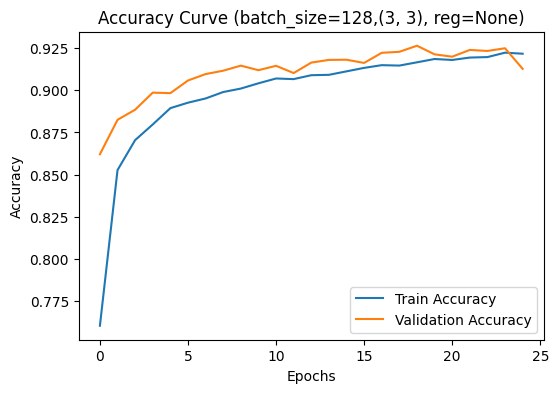

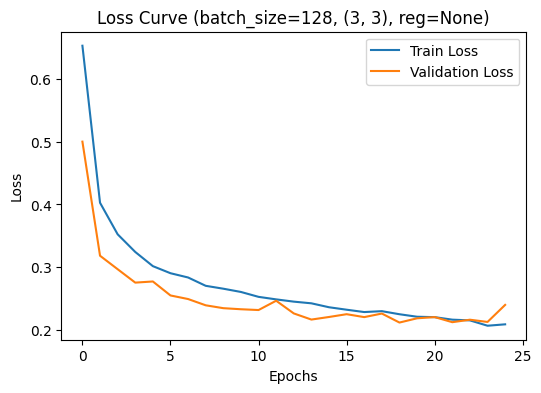

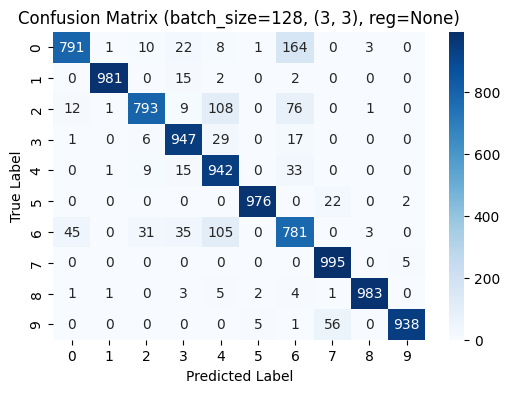

Training with filter_size=(3, 3), reg=None, batch_size=256


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.6211 - loss: 1.0467 - val_accuracy: 0.8424 - val_loss: 1.3949
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 184ms/step - accuracy: 0.8282 - loss: 0.4667 - val_accuracy: 0.8689 - val_loss: 0.4985
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.8534 - loss: 0.3907 - val_accuracy: 0.8776 - val_loss: 0.3243
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.8681 - loss: 0.3523 - val_accuracy: 0.8905 - val_loss: 0.2969
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.8777 - loss: 0.3319 - val_accuracy: 0.8978 - val_loss: 0.2802
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.8869 - loss: 0.3064 - val_accuracy: 0.8958 - val_loss: 0.2777
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.8883 - loss: 0.3001 - val_accuracy: 0.8996 - val_loss: 0.2696
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.8929 - loss: 0

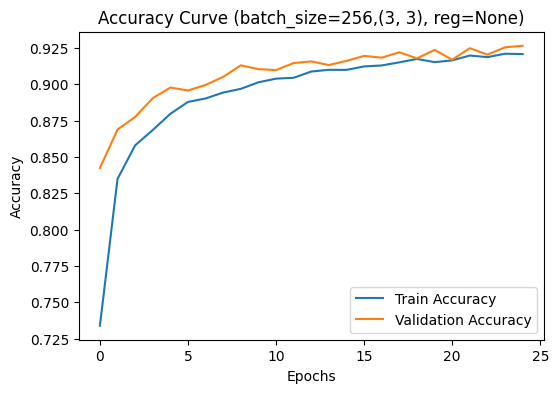

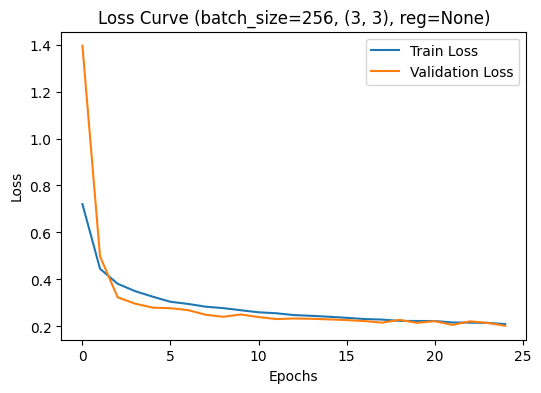

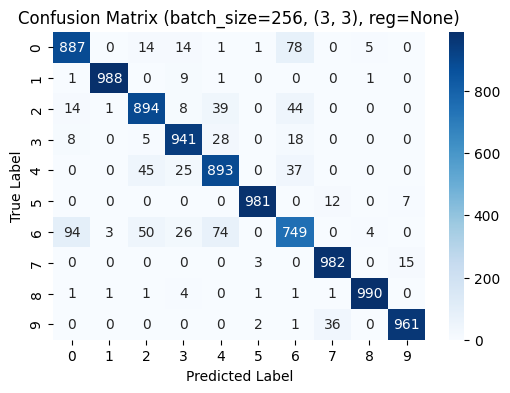

Training with filter_size=(3, 3), reg=0.01, batch_size=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - accuracy: 0.6598 - loss: 3.6628 - val_accuracy: 0.8497 - val_loss: 1.0435
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 182ms/step - accuracy: 0.8405 - loss: 0.7592 - val_accuracy: 0.8435 - val_loss: 0.7127
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 180ms/step - accuracy: 0.8509 - loss: 0.7061 - val_accuracy: 0.8754 - val_loss: 0.6552
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 180ms/step - accuracy: 0.8520 - loss: 0.7092 - val_accuracy: 0.8590 - val_loss: 0.6826
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 182ms/step - accuracy: 0.8586 - loss: 0.6922 - val_accuracy: 0.8737 - val_loss: 0.6462
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 180ms/step - accuracy: 0.8593 - loss: 0.6914 - val_accuracy: 0.8729 - val_loss: 0.6428
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 185ms/step - accuracy: 0.8544 - loss: 0.6862 - val_accuracy: 0.8747 - val_loss: 0.6271
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - accuracy: 0.8615 - loss: 0

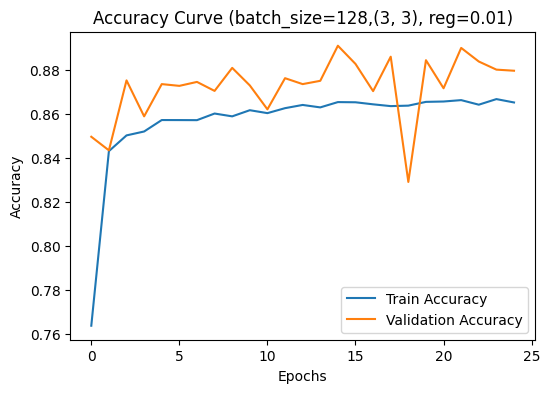

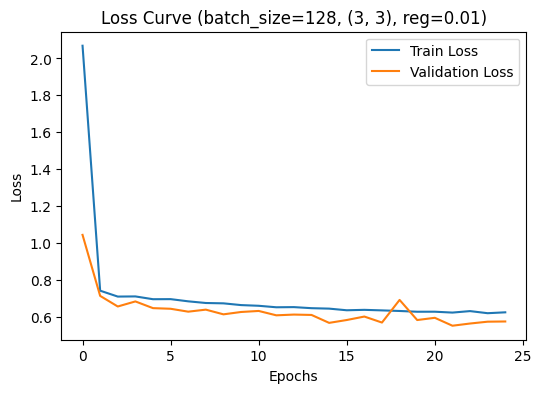

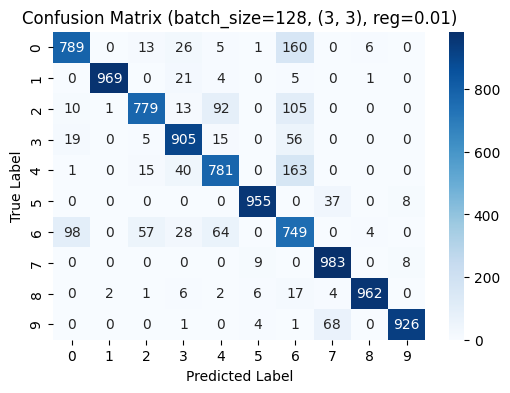

Training with filter_size=(3, 3), reg=0.01, batch_size=256


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - accuracy: 0.6192 - loss: 4.2697 - val_accuracy: 0.8454 - val_loss: 1.9239
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - accuracy: 0.8376 - loss: 0.8072 - val_accuracy: 0.8709 - val_loss: 0.8855
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 197ms/step - accuracy: 0.8493 - loss: 0.6693 - val_accuracy: 0.8625 - val_loss: 0.6277
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - accuracy: 0.8573 - loss: 0.6439 - val_accuracy: 0.8677 - val_loss: 0.6114
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - accuracy: 0.8584 - loss: 0.6428 - val_accuracy: 0.8681 - val_loss: 0.6109
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 183ms/step - accuracy: 0.8576 - loss: 0.6393 - val_accuracy: 0.8789 - val_loss: 0.5790
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - accuracy: 0.8641 - loss: 0.6287 - val_accuracy: 0.8764 - val_loss: 0.5891
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 183ms/step - accuracy: 0.8648 - loss: 0

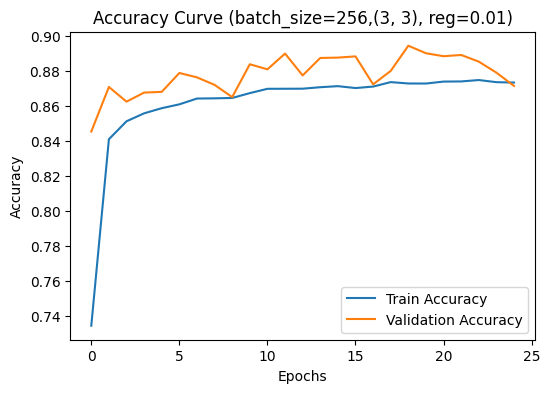

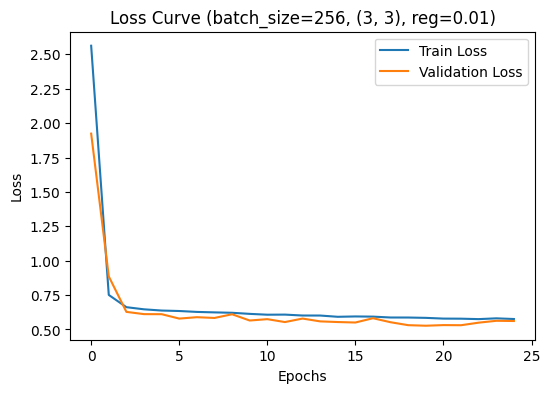

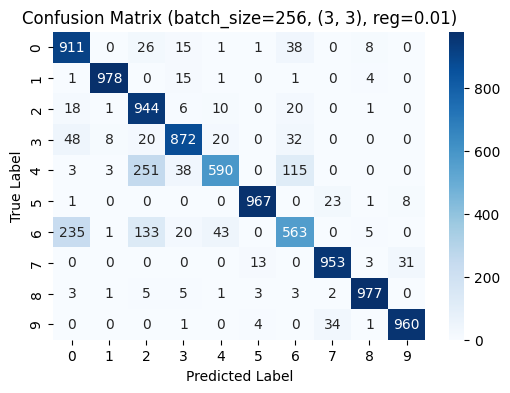

Training with filter_size=(5, 5), reg=None, batch_size=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 173ms/step - accuracy: 0.6686 - loss: 0.9191 - val_accuracy: 0.8612 - val_loss: 0.5018
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - accuracy: 0.8590 - loss: 0.3900 - val_accuracy: 0.8825 - val_loss: 0.3123
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.8727 - loss: 0.3376 - val_accuracy: 0.8966 - val_loss: 0.2813
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 177ms/step - accuracy: 0.8856 - loss: 0.3098 - val_accuracy: 0.8905 - val_loss: 0.2866
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - accuracy: 0.8922 - loss: 0.2916 - val_accuracy: 0.8999 - val_loss: 0.2687
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - accuracy: 0.8957 - loss: 0.2734 - val_accuracy: 0.9074 - val_loss: 0.2520
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 179ms/step - accuracy: 0.9017 - loss: 0.2605 - val_accuracy: 0.9087 - val_loss: 0.2505
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 178ms/step - accuracy: 0.9042 - loss: 0

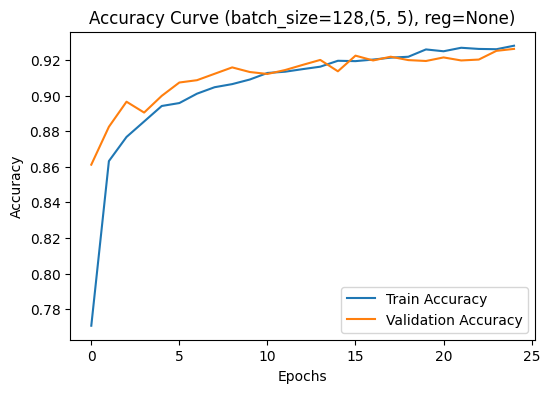

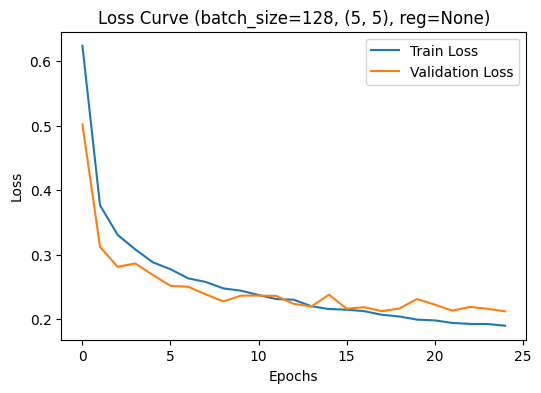

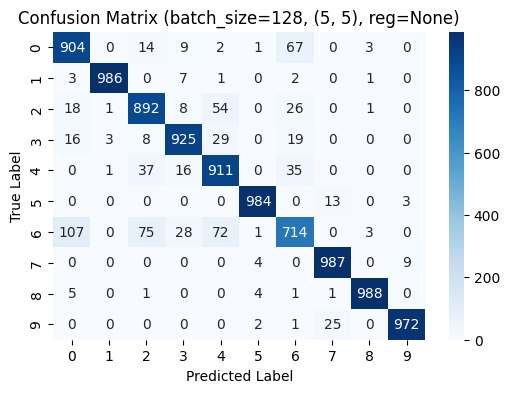

Training with filter_size=(5, 5), reg=None, batch_size=256


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 180ms/step - accuracy: 0.6465 - loss: 0.9895 - val_accuracy: 0.8417 - val_loss: 1.2897
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - accuracy: 0.8492 - loss: 0.4106 - val_accuracy: 0.8788 - val_loss: 0.4196
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 181ms/step - accuracy: 0.8719 - loss: 0.3397 - val_accuracy: 0.8873 - val_loss: 0.2965
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - accuracy: 0.8834 - loss: 0.3118 - val_accuracy: 0.8964 - val_loss: 0.2771
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - accuracy: 0.8934 - loss: 0.2867 - val_accuracy: 0.8998 - val_loss: 0.2609
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 178ms/step - accuracy: 0.8948 - loss: 0.2783 - val_accuracy: 0.9030 - val_loss: 0.2589
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 179ms/step - accuracy: 0.9002 - loss: 0.2654 - val_accuracy: 0.8993 - val_loss: 0.2620
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - accuracy: 0.9051 - loss: 0

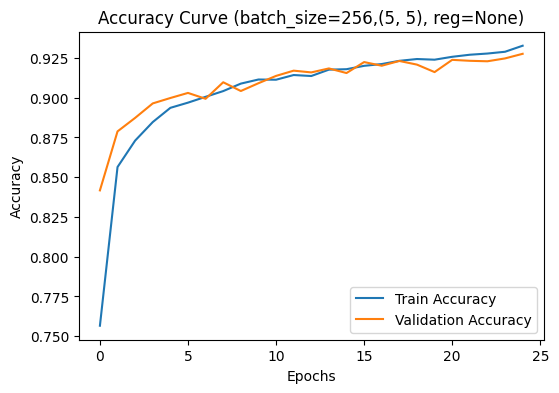

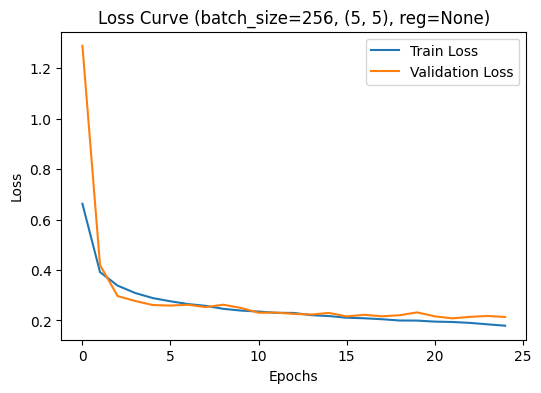

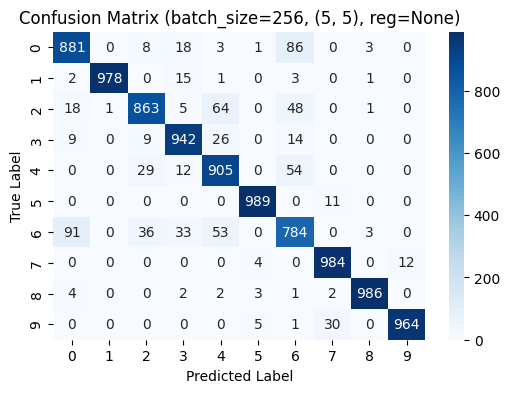

Training with filter_size=(5, 5), reg=0.01, batch_size=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 187ms/step - accuracy: 0.6810 - loss: 3.4666 - val_accuracy: 0.8595 - val_loss: 0.9365
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 188ms/step - accuracy: 0.8427 - loss: 0.7431 - val_accuracy: 0.8691 - val_loss: 0.6676
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - accuracy: 0.8528 - loss: 0.7140 - val_accuracy: 0.8447 - val_loss: 0.7112
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 187ms/step - accuracy: 0.8562 - loss: 0.7125 - val_accuracy: 0.8693 - val_loss: 0.6630
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 188ms/step - accuracy: 0.8575 - loss: 0.7001 - val_accuracy: 0.8618 - val_loss: 0.6861
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - accuracy: 0.8598 - loss: 0.6865 - val_accuracy: 0.8769 - val_loss: 0.6259
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 187ms/step - accuracy: 0.8615 - loss: 0.6758 - val_accuracy: 0.8784 - val_loss: 0.6180
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 189ms/step - accuracy: 0.8631 - loss: 0

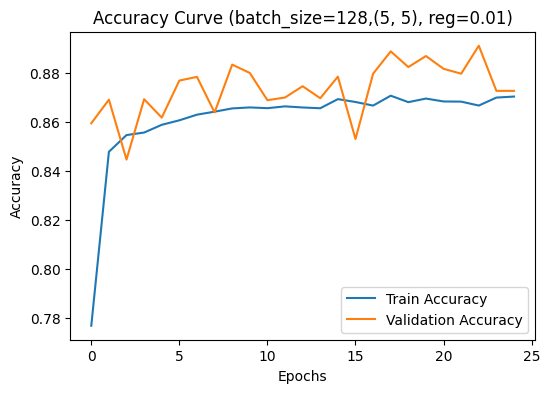

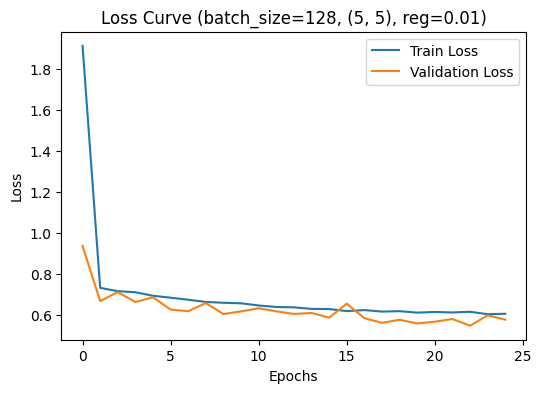

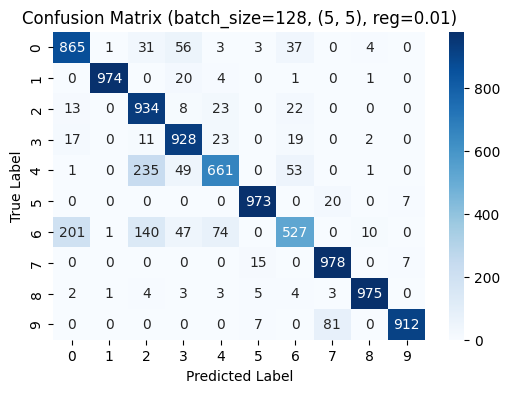

Training with filter_size=(5, 5), reg=0.01, batch_size=256


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 194ms/step - accuracy: 0.6483 - loss: 4.1091 - val_accuracy: 0.8534 - val_loss: 1.8829
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 195ms/step - accuracy: 0.8457 - loss: 0.7604 - val_accuracy: 0.8641 - val_loss: 0.9029
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 191ms/step - accuracy: 0.8582 - loss: 0.6549 - val_accuracy: 0.8677 - val_loss: 0.6289
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 194ms/step - accuracy: 0.8620 - loss: 0.6407 - val_accuracy: 0.8674 - val_loss: 0.6251
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 190ms/step - accuracy: 0.8675 - loss: 0.6288 - val_accuracy: 0.8782 - val_loss: 0.5999
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - accuracy: 0.8689 - loss: 0.6345 - val_accuracy: 0.8690 - val_loss: 0.6209
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.8687 - loss: 0.6347 - val_accuracy: 0.8648 - val_loss: 0.6204
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 187ms/step - accuracy: 0.8704 - loss: 0

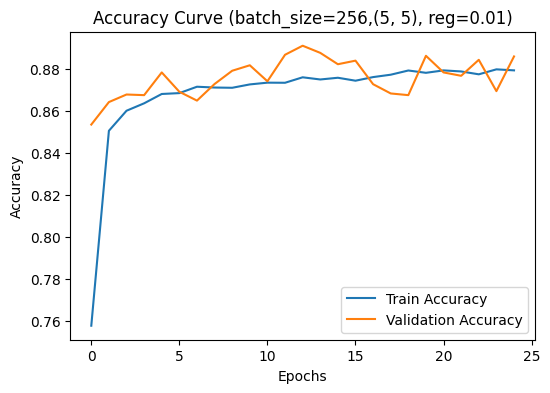

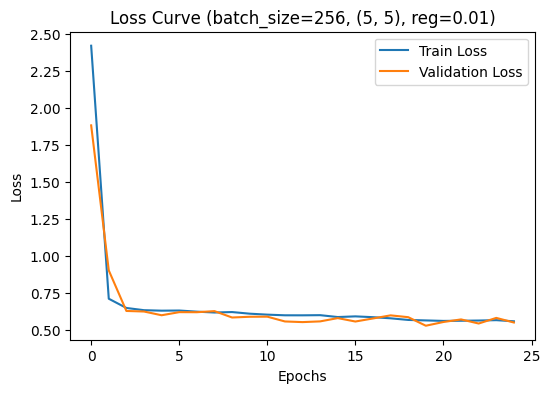

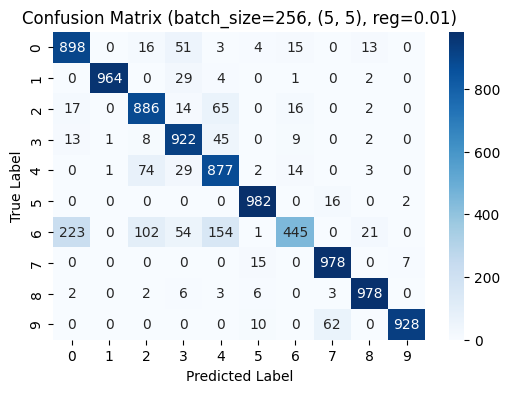

In [10]:
for filter_size, reg, batch_size in itertools.product(filter_sizes, regularizations, batch_sizes):
    print(f"Training with filter_size={filter_size}, reg={reg}, batch_size={batch_size}")
    title = f"Filter_size_{filter_size[0]}X{filter_size[1]}_Reg_{reg}_Batch_{batch_size}"

    model = build_model(filter_size, reg)

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=25, batch_size=batch_size, validation_data=(x_test, y_test))
    training_time = time.time() - start_time

    accuracy_curves[title] = (history.history['accuracy'], history.history['val_accuracy'])
    loss_curves[title] = (history.history['loss'], history.history['val_loss'])

    y_pred = np.argmax(model.predict(x_test), axis=1)
    test_loss, test_acc = model.evaluate(x_test, y_test)

      # Predictions & Metrics
    y_true = np.argmax(y_test, axis=1)  # Convert y_test to categorical labels
    test_accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    confusion_matrices[title] = cm


    acc_plot_path = os.path.join(ROOT_DIR, "accuracy_curves", f"accuracy_plot_{title}.png")
    loss_plot_path = os.path.join(ROOT_DIR, "loss_curves", f"loss_plot_{title}.png")
    cm_plot_path = os.path.join(ROOT_DIR, "confusion_matrices", f"confusion_matrix_{title}.png")
    save_model=os.path.join(ROOT_DIR, "saved_models", f"model_{title}.keras")

    #Saving model
    model.save(save_model.replace('.h5', '.keras'))

    print(f"Test Accuracy: {test_accuracy:.4f}, Training Time: {training_time:.2f} sec")

    # Plot Accuracy and Loss Curves


    # Accuracy plot
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy Curve (batch_size={batch_size},{filter_size}, reg={reg})')
    plt.savefig(acc_plot_path)
    plt.show()
    plt.close()

    # Loss plot
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve (batch_size={batch_size}, {filter_size}, reg={reg})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(loss_plot_path)
    plt.show()
    plt.close()



    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.title(f"Confusion Matrix (batch_size={batch_size}, {filter_size}, reg={reg})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig(cm_plot_path)
    plt.show()
    plt.close()

    # Append results to table
    results_table.append([
                    filter_size, reg, batch_size, test_accuracy, round(training_time, 2),
                    acc_plot_path, loss_plot_path, cm_plot_path
                ])



    del model  # Explicitly delete model after training

# Convert results into a DataFrame and print
df_results = pd.DataFrame(results_table, columns=[
    "Filter Size", "Regularization", "Batch Size", "Test Accuracy", "Execution Time (sec)",
    "Accuracy Plot", "Loss Plot", "Confusion Matrix"
])

In [11]:
# Define file paths
csv_path = os.path.join(ROOT_DIR, "training_results.csv")
# Save DataFrame as CSV
df_results.to_csv(csv_path, index=False)
print(f"\n Training results saved successfully in:- {csv_path}")



 Training results saved successfully in:- /content/drive/MyDrive/MBM_NN_LAB_6TH_SEM/EXP_5_trial/training_results.csv


## **4.Description of Code**

- **Data Loading & Preprocessing:**

   - The dataset is loaded using tensorflow.keras.datasets.fashion_mnist.

   - Images are normalized to [0,1] range.

   - Reshaping is done to match CNN input requirements.

- **Model Construction (build_model):**

   - A sequential CNN model with configurable filter sizes and regularization.

   - Uses Conv2D, MaxPooling2D, Flatten, Dense layers.
   
   - The model is trained for **25 epochs** using different configurations for hyperparameter tuning with varying
     - **Filter Sizes**: (3 x 3) , (5 x 5)

     - **Regularization**: None and 0.01 (L2 Regularization)

     - **Batch Sizes**: 128 and 256

     - **Optimizers**: Adam

- **Training & Evaluation:**

   - Total of 8 different configuration are trained to find the optimal configuration with significant accuracy, using different filters and batch sizes.

   - Performance is evaluated using accuracy_score and confusion_matrix.

- **Visualization:**

   - Accuracy and loss curves are plotted using matplotlib.

   - Confusion matrices are visualized with seaborn.

To evaluate the model for optimal configuaration.




## **5. Performance Evaluation**

# **Training Results Summary**

This table summarizes different model variations and their performance with visualizations.

| Filter Size | Regularization | Batch Size | Test Accuracy | Execution Time (sec) | Accuracy Curve | Loss Curve | Confusion Matrix |
|------------|---------------|------------|-------------|------------------|----------------|------------|----------------|
| (3, 3) | nan | 128 | 91.27 | 2010.56 | ![](EXP_5_trial/accuracy_curves/accuracy_plot_Filter_size_3X3_Reg_None_Batch_128.png) | ![](EXP_5_trial/loss_curves/loss_plot_Filter_size_3X3_Reg_None_Batch_128.png) | ![](EXP_5_trial/confusion_matrices/confusion_matrix_Filter_size_3X3_Reg_None_Batch_128.png) |
| (3, 3) | nan | 256 | 92.66 | 1022.04 | ![](EXP_5_trial/accuracy_curves/accuracy_plot_Filter_size_3X3_Reg_None_Batch_256.png) | ![](EXP_5_trial/loss_curves/loss_plot_Filter_size_3X3_Reg_None_Batch_256.png) | ![](EXP_5_trial/confusion_matrices/confusion_matrix_Filter_size_3X3_Reg_None_Batch_256.png) |
| (3, 3) | 0.01 | 128 | 87.98 | 2123.74 | ![](EXP_5_trial/accuracy_curves/accuracy_plot_Filter_size_3X3_Reg_0.01_Batch_128.png) | ![](EXP_5_trial/loss_curves/loss_plot_Filter_size_3X3_Reg_0.01_Batch_128.png) | ![](EXP_5_trial/confusion_matrices/confusion_matrix_Filter_size_3X3_Reg_0.01_Batch_128.png) |
| (3, 3) | 0.01 | 256 | 87.15 | 1079.24 | ![](EXP_5_trial/accuracy_curves/accuracy_plot_Filter_size_3X3_Reg_0.01_Batch_256.png) | ![](EXP_5_trial/loss_curves/loss_plot_Filter_size_3X3_Reg_0.01_Batch_256.png) | ![](EXP_5_trial/confusion_matrices/confusion_matrix_Filter_size_3X3_Reg_0.01_Batch_256.png) |
| (5, 5) | nan | 128 | 92.63 | 2075.83 | ![](EXP_5_trial/accuracy_curves/accuracy_plot_Filter_size_5X5_Reg_None_Batch_128.png) | ![](EXP_5_trial/loss_curves/loss_plot_Filter_size_5X5_Reg_None_Batch_128.png) | ![](EXP_5_trial/confusion_matrices/confusion_matrix_Filter_size_5X5_Reg_None_Batch_128.png) |
| (5, 5) | nan | 256 | 93.26 | 1047.53 | ![](EXP_5_trial/accuracy_curves/accuracy_plot_Filter_size_5X5_Reg_None_Batch_256.png) | ![](EXP_5_trial/loss_curves/loss_plot_Filter_size_5X5_Reg_None_Batch_256.png) | ![](EXP_5_trial/confusion_matrices/confusion_matrix_Filter_size_5X5_Reg_None_Batch_256.png) |
| (5, 5) | 0.01 | 128 | 87.27 | 2190.33 | ![](EXP_5_trial/accuracy_curves/accuracy_plot_Filter_size_5X5_Reg_0.01_Batch_128.png) | ![](EXP_5_trial/loss_curves/loss_plot_Filter_size_5X5_Reg_0.01_Batch_128.png) | ![](EXP_5_trial/confusion_matrices/confusion_matrix_Filter_size_5X5_Reg_0.01_Batch_128.png) |
| (5, 5) | 0.01 | 256 | 88.58 | 1115.96 | ![](EXP_5_trial/accuracy_curves/accuracy_plot_Filter_size_5X5_Reg_0.01_Batch_256.png) | ![](EXP_5_trial/loss_curves/loss_plot_Filter_size_5X5_Reg_0.01_Batch_256.png) | ![](EXP_5_trial/confusion_matrices/confusion_matrix_Filter_size_5X5_Reg_0.01_Batch_256.png) |




The model's performance is evaluated using:
- **Test Accuracy:** Measures the classification performance.
- **Loss Curve:** Shows training and validation loss trends during training.
- **Accuracy Curve:** Tracks the change in accuracy across epochs.
- **Confusion Matrix:** Visualizes model predictions compared to actual labels and Highlights classification errors.

Viewing some images with there one hot encoded labels

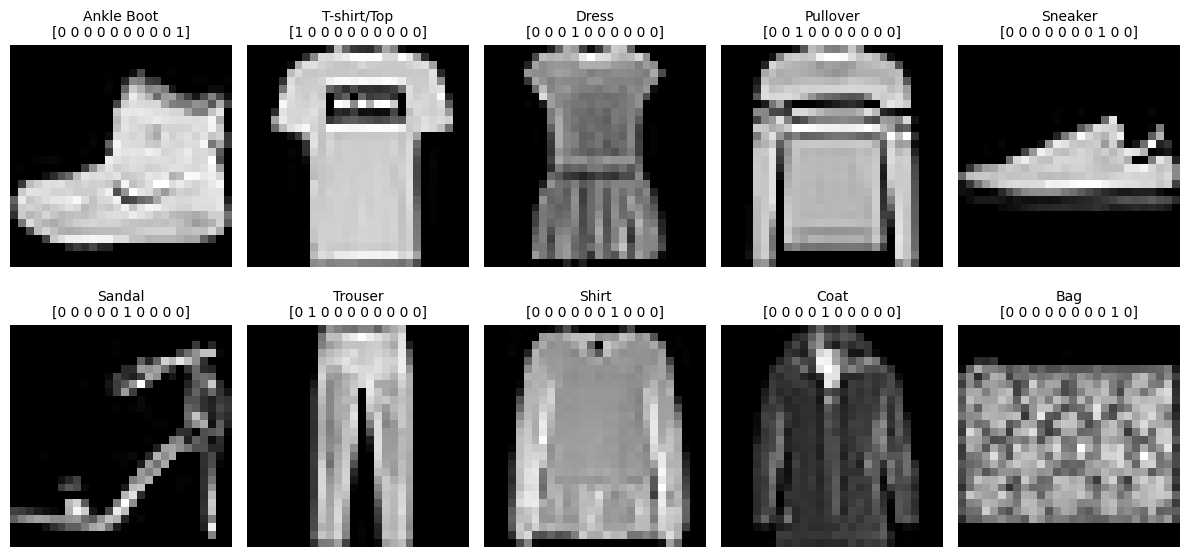

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define class labels for Fashion MNIST
class_labels = [
    "T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Initialize a dictionary to store one image per class
class_images = {}

# Find one example for each class
for idx, label in enumerate(np.argmax(y_train, axis=1)):  # Convert one-hot to class index
    if label not in class_images:
        class_images[label] = (x_train[idx], y_train[idx])  # Store image and one-hot label
    if len(class_images) == 10:  # Stop when we have all 10 classes
        break

# Plot images with labels
plt.figure(figsize=(12, 6))

for i, (class_idx, (image, one_hot_label)) in enumerate(class_images.items()):
    plt.subplot(2, 5, i + 1)  # Arrange in 2 rows, 5 columns
    plt.imshow(image.reshape(28, 28), cmap="gray")  # Display in grayscale
    plt.axis("off")

    # Convert one-hot encoded label to string
    one_hot_text = f"{one_hot_label.astype(int)}"

    # Set title with class name and one-hot encoding
    plt.title(f"{class_labels[class_idx]}\n{one_hot_text}", fontsize=10)

plt.tight_layout()
plt.show()


## **6. My Comments**

### Limitations:
- Training is done for only 25 epochs due to time constraints, which may not be optimal and max test accuracy achieved was 93.26.
- The model architecture is basic, additional layers or augmentation could improve performance.
- The images of some clasess are similar to each other like "shirt" and "T-shirt/Top" which may cause the accuracy to not increase after a certain limit

### Scope for Improvement:
- Experiment with more hyperparameters like activation functions,number conv2d layers.
- Increase training epochs and use learning rate scheduling.
- Using  data augmentation techniques to improve generalization.
- Expermenting with different pre built cnn architecture like ***ResNet** can enhance the accuracy and time.



### Some different architecture which was able to achieve 94% accuracy

This project uses a deep CNN architecture enhanced with advanced training techniques for robust and efficient image classification. The model incorporates:

- Convolutional Layers with Residual Connections to improve gradient flow and feature learning.

- Batch Normalization and Dropout for regularization and faster convergence.

- Global Average Pooling instead of fully connected layers to reduce overfitting.

- Data Augmentation (rotation, zoom, shift, shear) to improve generalization on unseen data.

- Label Smoothing to prevent the model from becoming overconfident.

- Learning Rate Scheduling using exponential decay to gradually reduce learning rate during training.

- Early Stopping and Model Checkpointing to save the best model and prevent overfitting.

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6385 - loss: 1.4014

234/234 ━━━━━━━━━━━━━━━━━━━━ 48s 143ms/step - accuracy: 0.6389 - loss: 1.4003 - val_accuracy: 0.1442 - val_loss: 2.6971
Epoch 2/150
  1/234 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.8281 - loss: 0.9429

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8281 - loss: 0.9429 - val_accuracy: 0.1275 - val_loss: 2.6692
Epoch 3/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8288 - loss: 0.9184

234/234 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.8288 - loss: 0.9183 - val_accuracy: 0.3458 - val_loss: 1.9044
Epoch 4/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9141 - loss: 0.7737 - val_accuracy: 0.3308 - val_loss: 1.9254
Epoch 5/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8612 - loss: 0.8401

234/234 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.8612 - loss: 0.8401 - val_accuracy: 0.8543 - val_loss: 0.8373
Epoch 6/150
  1/234 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8633 - loss: 0.8567

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8633 - loss: 0.8567 - val_accuracy: 0.8632 - val_loss: 0.8213
Epoch 7/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8792 - loss: 0.7938

234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8792 - loss: 0.7938 - val_accuracy: 0.9010 - val_loss: 0.7421
Epoch 8/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9023 - loss: 0.7593 - val_accuracy: 0.8982 - val_loss: 0.7468
Epoch 9/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8872 - loss: 0.7728 - val_accuracy: 0.8726 - val_loss: 0.7999
Epoch 10/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8789 - loss: 0.7723 - val_accuracy: 0.8723 - val_loss: 0.8059
Epoch 11/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.8957 - loss: 0.7556 - val_accuracy: 0.9006 - val_loss: 0.7242
Epoch 12/150
  1/234 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8633 - loss: 0.7750

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8633 - loss: 0.7750 - val_accuracy: 0.9057 - val_loss: 0.7154
Epoch 13/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.8985 - loss: 0.7463 - val_accuracy: 0.9019 - val_loss: 0.7236
Epoch 14/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8945 - loss: 0.7682 - val_accuracy: 0.8961 - val_loss: 0.7354
Epoch 15/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9049 - loss: 0.7346

234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9049 - loss: 0.7346 - val_accuracy: 0.9108 - val_loss: 0.7145
Epoch 16/150
  1/234 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9336 - loss: 0.7093

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9336 - loss: 0.7093 - val_accuracy: 0.9111 - val_loss: 0.7143
Epoch 17/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9046 - loss: 0.7294 - val_accuracy: 0.9014 - val_loss: 0.7264
Epoch 18/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9062 - loss: 0.7140 - val_accuracy: 0.8968 - val_loss: 0.7338
Epoch 19/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9074 - loss: 0.7245 - val_accuracy: 0.9094 - val_loss: 0.7048
Epoch 20/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.6912 - val_accuracy: 0.9041 - val_loss: 0.7142
Epoch 21/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9113 - loss: 0.7161

234/234 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.9113 - loss: 0.7161 - val_accuracy: 0.9155 - val_loss: 0.6941
Epoch 22/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9023 - loss: 0.7355 - val_accuracy: 0.9122 - val_loss: 0.7012
Epoch 23/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.9134 - loss: 0.7084 - val_accuracy: 0.9150 - val_loss: 0.6966
Epoch 24/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9297 - loss: 0.6848 - val_accuracy: 0.9146 - val_loss: 0.6979
Epoch 25/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9177 - loss: 0.7032

234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9177 - loss: 0.7032 - val_accuracy: 0.9227 - val_loss: 0.6814
Epoch 26/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9180 - loss: 0.7044 - val_accuracy: 0.9214 - val_loss: 0.6839
Epoch 27/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9165 - loss: 0.7045 - val_accuracy: 0.9133 - val_loss: 0.6963
Epoch 28/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9141 - loss: 0.6817 - val_accuracy: 0.9182 - val_loss: 0.6869
Epoch 29/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9200 - loss: 0.6969 - val_accuracy: 0.9225 - val_loss: 0.6742
Epoch 30/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9297 - loss: 0.6700 - val_accuracy: 0.9225 - val_loss: 0.6748
Epoch 31/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9226 - loss: 0.6930 - val_accuracy: 0.9104 - val_loss: 0.6992
Epoch 32/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9297 - loss: 0.6931 - val_

234/234 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.9317 - loss: 0.6708 - val_accuracy: 0.9269 - val_loss: 0.6671
Epoch 44/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.6652 - val_accuracy: 0.9267 - val_loss: 0.6664
Epoch 45/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9328 - loss: 0.6702

234/234 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9328 - loss: 0.6702 - val_accuracy: 0.9294 - val_loss: 0.6589
Epoch 46/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9180 - loss: 0.6626 - val_accuracy: 0.9294 - val_loss: 0.6585
Epoch 47/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9330 - loss: 0.6667 - val_accuracy: 0.9118 - val_loss: 0.7004
Epoch 48/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9414 - loss: 0.6821 - val_accuracy: 0.9153 - val_loss: 0.6953
Epoch 49/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9351 - loss: 0.6628 - val_accuracy: 0.9233 - val_loss: 0.6726
Epoch 50/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9336 - loss: 0.6453 - val_accuracy: 0.9232 - val_loss: 0.6722
Epoch 51/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9357 - loss: 0.6598 - val_accuracy: 0.9105 - val_loss: 0.6926
Epoch 52/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9375 - loss: 0.6582 - val_a

234/234 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9405 - loss: 0.6539 - val_accuracy: 0.9353 - val_loss: 0.6475
Epoch 56/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9688 - loss: 0.6272 - val_accuracy: 0.9345 - val_loss: 0.6481
Epoch 57/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9395 - loss: 0.6535

234/234 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9395 - loss: 0.6535 - val_accuracy: 0.9359 - val_loss: 0.6470
Epoch 58/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9375 - loss: 0.6588 - val_accuracy: 0.9358 - val_loss: 0.6454
Epoch 59/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9410 - loss: 0.6512 - val_accuracy: 0.9308 - val_loss: 0.6584
Epoch 60/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9766 - loss: 0.6123 - val_accuracy: 0.9299 - val_loss: 0.6577
Epoch 61/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9412 - loss: 0.6482 - val_accuracy: 0.9346 - val_loss: 0.6531
Epoch 62/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9336 - loss: 0.6599 - val_accuracy: 0.9328 - val_loss: 0.6555
Epoch 63/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9436 - loss: 0.6444 - val_accuracy: 0.9299 - val_loss: 0.6637
Epoch 64/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9336 - loss: 0.6601 - val_

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9492 - loss: 0.6340 - val_accuracy: 0.9361 - val_loss: 0.6474
Epoch 71/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9460 - loss: 0.6388 - val_accuracy: 0.9223 - val_loss: 0.6709
Epoch 72/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9453 - loss: 0.6288 - val_accuracy: 0.9231 - val_loss: 0.6687
Epoch 73/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9484 - loss: 0.6363

234/234 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.9484 - loss: 0.6363 - val_accuracy: 0.9391 - val_loss: 0.6411
Epoch 74/150
  1/234 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9492 - loss: 0.6387

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9492 - loss: 0.6387 - val_accuracy: 0.9403 - val_loss: 0.6400
Epoch 75/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9489 - loss: 0.6329 - val_accuracy: 0.9370 - val_loss: 0.6504
Epoch 76/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9492 - loss: 0.6639 - val_accuracy: 0.9365 - val_loss: 0.6501
Epoch 77/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.9491 - loss: 0.6323 - val_accuracy: 0.9324 - val_loss: 0.6518
Epoch 78/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9531 - loss: 0.6420 - val_accuracy: 0.9325 - val_loss: 0.6519
Epoch 79/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.9472 - loss: 0.6344 - val_accuracy: 0.9325 - val_loss: 0.6541
Epoch 80/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9492 - loss: 0.6390 - val_accuracy: 0.9318 - val_loss: 0.6545
Epoch 81/150
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9500 - loss: 0.6287 - val_a

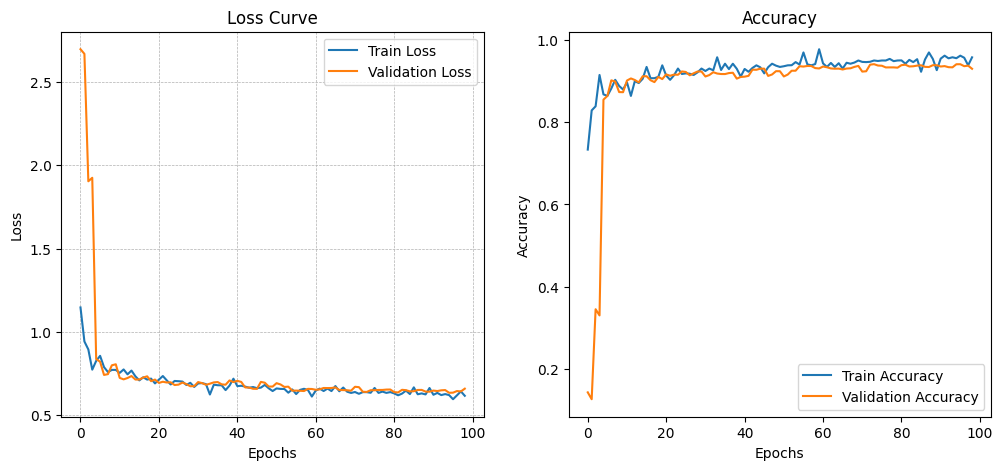

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    zoom_range=0.08,
    shear_range=0.08,
    horizontal_flip=False
)
datagen.fit(x_train)

# Enhanced Architecture with Residual Connections
def conv_block(l, filters, use_residual=False):
    l = Conv2D(filters, (3,3), padding='same')(l)
    l = BatchNormalization()(l)
    l = tf.keras.layers.Activation('relu')(l)
    l = Conv2D(filters, (3,3), padding='same')(l)
    l = BatchNormalization()(l)
    if use_residual:
        shortcut = Conv2D(filters, (1,1), padding='same')(l)
        l = tf.keras.layers.add([l, shortcut])
    l = tf.keras.layers.Activation('relu')(l)
    return l

inputs = tf.keras.Input(shape=(28,28,1))
x = conv_block(inputs, 64)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.3)(x)

x = conv_block(x, 128, use_residual=True)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.3)(x)

x = conv_block(x, 256)
x = GlobalAveragePooling2D()(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = Dropout(0.6)(x)
outputs = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Custom Learning Rate Schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = Adam(learning_rate=lr_schedule)

# Add Label Smoothing
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])

# Enhanced Callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=25, mode='max')
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True,
                            monitor='val_accuracy', mode='max')

# Train model
history = model.fit(datagen.flow(x_train, y_train, batch_size=256),
                    steps_per_epoch=len(x_train)//256,
                    epochs=150,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop, checkpoint])

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()